<a href="https://colab.research.google.com/github/Shubhankitsirvaiya/Airbnb/blob/main/Shubhankit_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
'''
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

'''

'\n# Important library for many geopython libraries\n!apt install gdal-bin python-gdal python3-gdal \n# Install rtree - Geopandas requirment\n!apt install python3-rtree \n# Install Geopandas\n!pip install git+git://github.com/geopandas/geopandas.git\n# Install descartes - Geopandas requirment\n!pip install descartes \n# Install Folium for Geographic data visualization\n!pip install folium\n# Install plotlyExpress\n!pip install plotly_express\n\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point,Polygon
%matplotlib inline

In [ ]:
bnb=pd.read_csv('/content/gdrive/MyDrive/Copy of Airbnb NYC 2019.csv')

In [ ]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#we can find most review by earned by the host using groupby by host id
#we can find avegare rating a host gets 
#which host gives most types of room'
#what are the average price for host services

#similarly we can go with niegbour hood

len(bnb['host_id'].unique())

37457

In [ ]:
bnb[bnb['host_id']==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


In [ ]:
len(bnb['neighbourhood'].value_counts())

221

In [ ]:
len(bnb['neighbourhood_group'].value_counts())

5

In [ ]:
len(bnb['room_type'].value_counts())

3

In [ ]:
#which neighbour hood has most number of host present
#most number of property are acquired by which host in each neighborur hood
#similar for nighbbours
#what is the averae price for each room type
#what is the count of minimum nights for each group and niegherbood groups (maximum)
#which nighbour hood and which group has most number reviews
#fetch month from the date columns and find month wise reviews for each group and nieghbourhood


In [ ]:
pd.DataFrame(bnb.groupby('neighbourhood',as_index=False)['host_id'].count().sort_values(ascending=False,by='host_id')[:5])

## this shows that which neighbourhood has most number of host present 

,neighbourhood,host_id
214,Williamsburg,3920
13,Bedford-Stuyvesant,3714
94,Harlem,2658
28,Bushwick,2465
202,Upper West Side,1971


In [ ]:
pd.DataFrame(bnb.groupby(['host_id','host_name'])['name'].count().sort_values(ascending=False)[:5])
#this shows which host has most number of property in whole reqgion

,,name
host_id,host_name,
219517861,Sonder (NYC),327
107434423,Blueground,232
30283594,Kara,121
137358866,Kazuya,103
12243051,Sonder,96


In [ ]:
pd.DataFrame(bnb.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False)[:5])

#nieghborhood with most number of reviews ,means that these nieghborhood has most number of customers.

,number_of_reviews
neighbourhood,
Bedford-Stuyvesant,110352
Williamsburg,85427
Harlem,75962
Bushwick,52514
Hell's Kitchen,50227


In [ ]:
pd.DataFrame(bnb.groupby(['room_type'])['price'].mean().sort_values(ascending=False)[:5])
#mean price for each type of room across whole region

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


In [ ]:
def minimum_night_cat(x):
  if x>=1 and x<=6:
    return 'few days'
  elif x==7:
    return 'week'
  elif x>7 and x<=29:
    return 'less than 1 month'
  elif x==30:
    return '1 month'
  elif x>30 and x<180:
    return 'more than a month'
  elif x>=180 and x<=365:
    return 'more than half year'
  elif x>365:
    return 'more than a year'

##converting minimum night stay to categorical column

In [ ]:
bnb['minimum_night_cat']=bnb['minimum_nights'].apply(minimum_night_cat)

In [ ]:
pd.DataFrame(bnb.groupby('minimum_night_cat')['id'].count().sort_values(ascending=False))

#ie most porperties are of type where minimum nights stay is less than 1 week.

,id
minimum_night_cat,
few days,39504
1 month,3760
less than 1 month,2826
week,2058
more than a month,623
more than half year,110
more than a year,14


In [ ]:
print(pd.DataFrame(bnb.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)))
## So brooklyl and Manhateten has most number of customers 

print(pd.DataFrame(bnb.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)))

print(pd.DataFrame(bnb.groupby('neighbourhood_group')['host_id'].count().sort_values(ascending=False)))


### WE can see that although number of customers and number of hosts are same in manhatten and brooklyn ,still the mean price is greater in broolyn.


                     number_of_reviews
neighbourhood_group                   
Brooklyn                        486574
Manhattan                       454569
Queens                          156950
Bronx                            28371
Staten Island                    11541
                          price
neighbourhood_group            
Manhattan            196.875814
Brooklyn             124.383207
Staten Island        114.812332
Queens                99.517649
Bronx                 87.496792
                     host_id
neighbourhood_group         
Manhattan              21661
Brooklyn               20104
Queens                  5666
Bronx                   1091
Staten Island            373


In [ ]:
bnb_manhatten=bnb[bnb['neighbourhood_group']=='Manhattan']
bnb_brooklyn=bnb[bnb['neighbourhood_group']=='Brooklyn']
print(bnb_manhatten.groupby('room_type')['id'].count())
print(bnb_brooklyn.groupby('room_type')['id'].count())


##So from here we can infer that the number of entire home type properties are more in Mnahattan ,therefore the avegrage price there is higher.


room_type
Entire home/apt    13199
Private room        7982
Shared room          480
Name: id, dtype: int64
room_type
Entire home/apt     9559
Private room       10132
Shared room          413
Name: id, dtype: int64


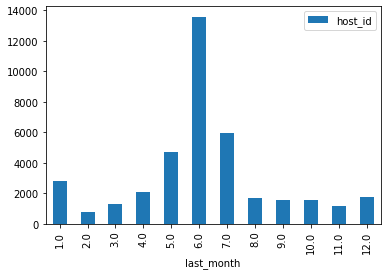

In [ ]:
bnb['last_review'] = pd.to_datetime(bnb['last_review'], format='%Y-%m-%d')
bnb['last_month']=bnb['last_review'].apply(lambda x: x.month)
pd.DataFrame(bnb.groupby('last_month')['host_id'].count()).plot.bar()

## from here we can infer that assuming people give review after leaving the service most people leave/Change the peoperty in the 6 th month of the year

In [ ]:
#geometry=[Point(xy) for xy in zip(bnb['latitude'],bnb['longitude'])]

In [ ]:
bnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
#geo_bnb=gpd.GeoDataFrame(bnb,geometry=geometry)

#geo_bnb.head()

In [ ]:
#street_map=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
#fig,ax=plt.subplots(figsize=(15,15))
#street_map.plot(ax=ax)

In [ ]:
## Now to find out which host are most busy

bnb_busy=pd.DataFrame(bnb.groupby('host_id',as_index=False)['reviews_per_month'].sum().sort_values(ascending=False,by='reviews_per_month'))[:3]

In [ ]:
bnb_busy

,host_id,reviews_per_month
34646,219517861,397.56
35825,244361589,111.72
35407,232251881,80.63


In [ ]:
bnb[(bnb.host_id==219517861)|(bnb.host_id==244361589)|(bnb.host_id==232251881)]['last_month'].value_counts()
###so we can say that as people living in these host's properties shift at peak time there fore they are more busy


6.0    163
5.0     43
7.0      9
4.0      6
Name: last_month, dtype: int64